In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

# 2D turbulence in eddy model

In [2]:
eddy_model = pyqg.QGModel(nx=128, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [3]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
eddy_model.run()

## Convert to xarray Datasets
eddy_model_highRes = eddy_model.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 1.70e-06, CFL: 0.006
INFO: Step: 20000, Time: 3.60e+07, KE: 4.92e-05, CFL: 0.012
INFO: Step: 30000, Time: 5.40e+07, KE: 8.67e-04, CFL: 0.071
INFO: Step: 40000, Time: 7.20e+07, KE: 1.60e-03, CFL: 0.092
INFO: Step: 50000, Time: 9.00e+07, KE: 1.73e-03, CFL: 0.090
INFO: Step: 60000, Time: 1.08e+08, KE: 1.77e-03, CFL: 0.084
INFO: Step: 70000, Time: 1.26e+08, KE: 1.87e-03, CFL: 0.092
INFO: Step: 80000, Time: 1.44e+08, KE: 1.79e-03, CFL: 0.090
INFO: Step: 90000, Time: 1.62e+08, KE: 1.76e-03, CFL: 0.104
INFO: Step: 100000, Time: 1.80e+08, KE: 1.67e-03, CFL: 0.110
INFO: Step: 110000, Time: 1.98e+08, KE: 1.69e-03, CFL: 0.108
INFO: Step: 120000, Time: 2.16e+08, KE: 1.80e-03, CFL: 0.102
INFO: Step: 130000, Time: 2.34e+08, KE: 1.65e-03, CFL: 0.094
INFO: Step: 140000, Time: 2.52e+08, KE: 1.61e-03, CFL: 0.097
INFO: Step: 150000, Time: 2.70e+08, KE: 1.69e-03, CFL: 0.099
INFO: Step: 160000, Time: 2.88e+08, KE: 1.81e-03, CFL: 0.110
INFO: Step: 170000, Time: 3.06e+0

In [4]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 128, x: 128, l: 128, k: 65,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * y                  (y) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0003958 0.0004021
Data variables: (12/32)
    q                  (time, lev, y, x) float64 -1.463e-05 ... 3.437e-06
    u                  (time, lev, y, x) float64 -0.06033 -0.05843 ... -0.0355
    v                  (time, lev, y, x) float64 -0.01636 -0.02947 ... -0.001588
    ufull              (time, lev, y, x) float64 -0.03533 -0.03343 ... -0.0355
    vfull              (time, lev, y, x) float64 -0.01636 -0.02947 ... -0.001588
    qh                 (time, lev, l, k) complex128 (0.009304271378790169+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 6.454e-21 ... 1.826e-63
    ENSfrictionspec    (time, l, k) float64 0.0 1.423e-23 ... -2.437e-61
    APEgenspec         (time, l, k) float64 0.0 1.452e-12 ... 4.108e-55
    APEflux            (time, l, k) float64 -0.0 -1.083e-12 ... 1.103e-35
    KEflux             (time, l, k) float64 0.0 2.724e-13 ... 3.813e-33
    APEgen             (time) float64 3.711e-10
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [42]:
# write data to scratch bucket after initial run

#import os
#import xarray as xr
#SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
#eddy_model_highRes.to_zarr('gs://leap-scratch/panalluri/eddy_model_highRes3.zarr')  # write data

In [44]:
# check to see files present in scratch
#gcs = fsspec.filesystem('gcs')
#gcs.ls("gs://leap-scratch/panalluri")

['leap-scratch/panalluri/eddy_model_highRes.zarr',
 'leap-scratch/panalluri/eddy_model_highRes2.zarr',
 'leap-scratch/panalluri/eddy_model_highRes3.zarr']

In [3]:
# access data set to be used -- data from a previous simulation

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
gcs = fsspec.filesystem('gcs')
gcs.ls("gs://leap-scratch/panalluri")
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_highRes3.zarr") 
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, l: 256, k: 129, lev: 2, y: 256, x: 256,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 3.11e+08
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 1, 128, 129), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 1, 128, 129), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          65536
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

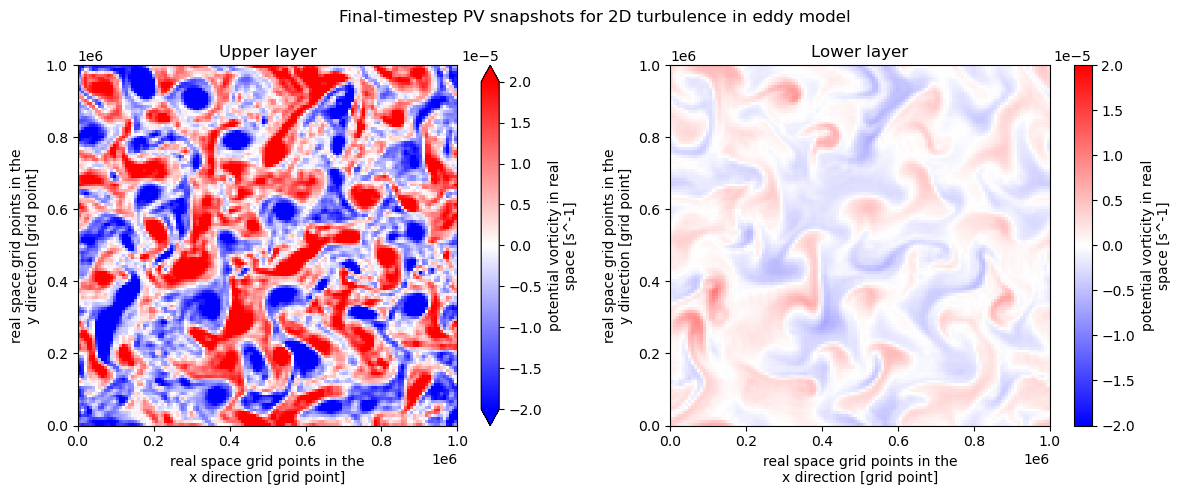

In [5]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in eddy model")
plt.subplot(121); eddy_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); eddy_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

## Coarsening data

In [6]:
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

In [7]:
op1 = coarsening.Operator1(eddy_model, 64) #for now, need to re-run above simulation for this to work -- maybe make a coarsening data section w/ and w/o the op1 data structure?
op1.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 -1.345e-05 -1.123e-05 ... 4.236e-06
    u        (time, lev, y, x) float64 -0.07684 -0.08806 ... -0.02089 -0.02778
    v        (time, lev, y, x) float64 -0.04819 -0.01075 ... -0.0005285
    ufull    (time, lev, y, x) float64 -0.05184 -0.06306 ... -0.02089 -0.02778
    vfull    (time, lev, y, x) float64 -0.04819 -0.01075 ... -0.0005285
    qh       (time, lev, l, k) complex128 (0.0023260678446975418+0j) ... (-4....
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (1.7269578863986716e-13+2.08...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 8.889e-11 -2.222e-11
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 4.128e+03 3.583e+03 ... 56.5 19.77
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [8]:
# Helper function to display plots
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

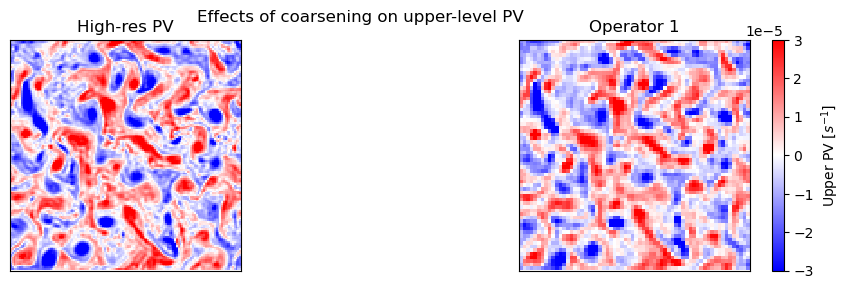

In [9]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on upper-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[0])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

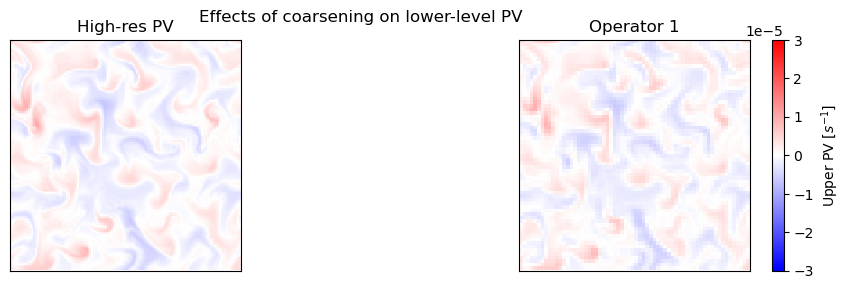

In [10]:
# Visualizing effects on lower-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on lower-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[1])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[1])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

Text(0.5, 0.98, 'Effects on upper PV forcing term')

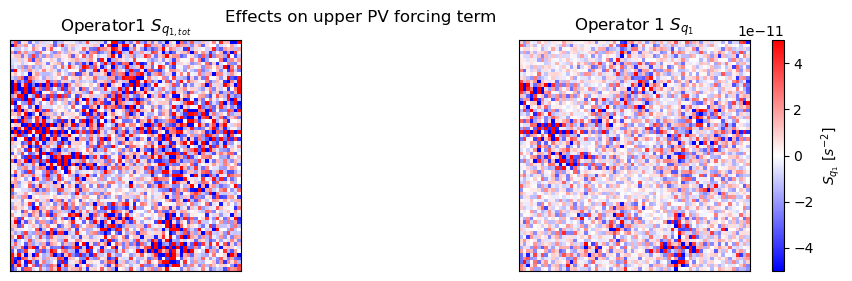

In [11]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on upper PV forcing term')

Text(0.5, 0.98, 'Effects on lower PV forcing term')

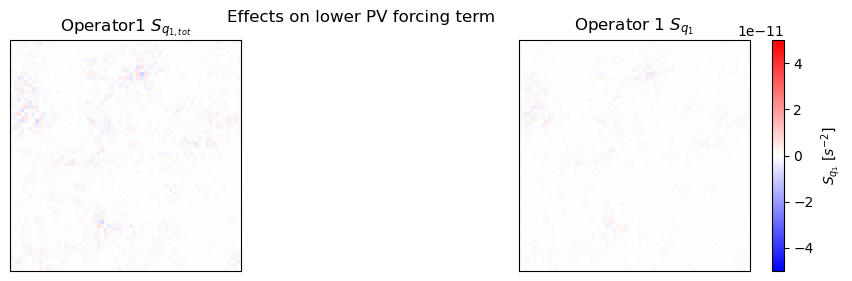

In [12]:
# Visualizing effects on lower PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[1], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[1], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on lower PV forcing term')

## Train FCNN on this data

In [13]:
from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization, FullyCNN

In [14]:
training_ds = op1.m2.to_dataset()
q_subs = op1.subgrid_forcing('q')
q_tot_subs = op1.q_forcing_total
u_subs = op1.subgrid_forcing('u')
v_subs = op1.subgrid_forcing('v')
uu_subs, uv_subs = op1.subgrid_fluxes('u')
vu_subs, vv_subs = op1.subgrid_fluxes('v')
qu_subs, qv_subs = op1.subgrid_fluxes('q')
training_dss = training_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs, 
                                  q_forcing_total=training_ds['dqdt'] * 0 + q_tot_subs,
                                  v_subgrid_forcing=training_ds['dqdt'] * 0 + v_subs,
                                  u_subgrid_forcing=training_ds['dqdt'] * 0 + u_subs,
                                  uu_subgrid_flux=training_ds['dqdt'] * 0 + uu_subs,
                                  uv_subgrid_flux=training_ds['dqdt'] * 0 + uv_subs, 
                                  vv_subgrid_flux=training_ds['dqdt'] * 0 + vv_subs, 
                                  uq_subgrid_flux=training_ds['dqdt'] * 0 + qu_subs,
                                  vq_subgrid_flux=training_ds['dqdt'] * 0 + qv_subs)
training_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/23)
    q                  (time, lev, y, x) float64 -1.345e-05 ... 4.236e-06
    u                  (time, lev, y, x) float64 -0.07684 -0.08806 ... -0.02778
    v                  (time, lev, y, x) float64 -0.04819 ... -0.0005285
    ufull              (time, lev, y, x) float64 -0.05184 -0.06306 ... -0.02778
    vfull              (time, lev, y, x) float64 -0.04819 ... -0.0005285
    qh                 (time, lev, l, k) complex128 (0.0023260678446975418+0j...
    ...                 ...
    u_subgrid_forcing  (time, lev, y, x) float64 -1.274e-07 ... -1.772e-09
    uu_subgrid_flux    (time, lev, y, x) float64 -0.0001206 ... 4.933e-05
    uv_subgrid_flux    (time, lev, y, x) float64 -0.0006085 ... 1.063e-05
    vv_subgrid_flux    (time, lev, y, x) float64 -0.003454 ... 7.022e-05
    uq_subgrid_flux    (time, lev, y, x) float64 3.499e-07 ... -6.143e-09
    vq_subgrid_flux    (time, lev, y, x) float64 3.574e-07 ... -8.928e-09
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [15]:
# save coarsening data to scratch bucket

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
training_dss.to_zarr('gs://leap-scratch/panalluri/eddy_model_coarseningOp1.zarr')  # write data

In [16]:
param = FCNNParameterization.train_on(training_dss, '/home/jovyan/pyqg_parameterization_benchmarks/testing/eddy_2Dturb',
                                      inputs=['q', 'u', 'v'], 
                                      targets = ['q_subgrid_forcing']) 

In [17]:
# Helpers methods to help visualize offline metrics/performance
def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

## Offline test

### Use test data set from Patricia -- note that her set is not 2D turbulence, it's just an eddy simulation w/ forcing1 (beta != 0)

In [100]:
gcs = fsspec.filesystem('gcs')
gcs.ls("gs://leap-persistent/pbluc/eddy/forcing1")
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()

### Offline test

In [101]:
preds1 = param.test_offline(eddy_forcing1)
preds1

<xarray.Dataset>
Dimensions:                                 (time: 87, lev: 2, y: 64, x: 64)
Coordinates:
  * lev                                     (lev) int32 1 2
  * time                                    (time) float32 0.0 ... 3.096e+08
  * x                                       (x) float32 7.812e+03 ... 9.922e+05
  * y                                       (y) float32 7.812e+03 ... 9.922e+05
Data variables: (12/14)
    q_subgrid_forcing                       (time, lev, y, x) float32 -2.647e...
    q_subgrid_forcing_predictions           (time, lev, y, x) float32 5.53e-1...
    q_subgrid_forcing_spatial_mse           (lev, y, x) float32 5.757e-23 ......
    q_subgrid_forcing_temporal_mse          (time, lev) float32 3.555e-25 ......
    q_subgrid_forcing_mse                   (lev) float32 9.911e-23 3.667e-26
    q_subgrid_forcing_spatial_skill         (lev, y, x) float32 -0.8795 ... -...
    ...                                      ...
    q_subgrid_forcing_spatial_correlation   (lev, y, x) float64 -0.09889 ... ...
    q_subgrid_forcing_temporal_correlation  (time, lev) float64 0.005095 ... ...
    q_subgrid_forcing_correlation           (lev) float64 -0.1263 -0.08608
    correlation                             (lev) float64 -0.1263 -0.08608
    mse                                     (lev) float32 9.911e-23 3.667e-26
    skill                                   (lev) float32 -1.194 -2.256
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

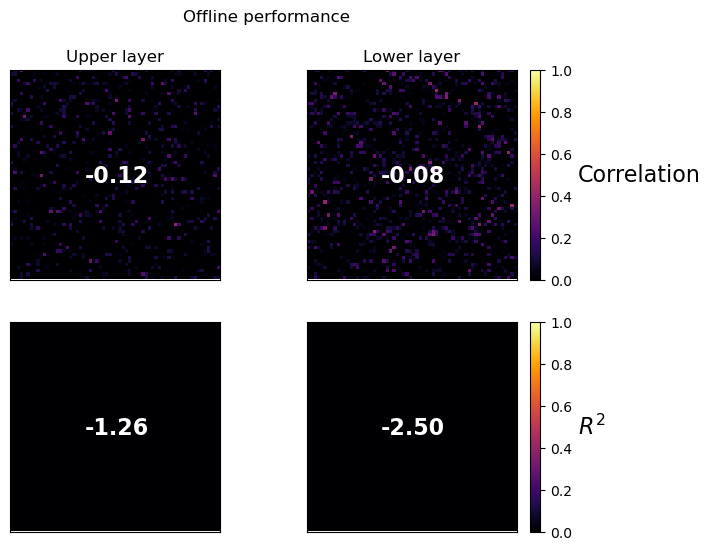

In [102]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds1.q_subgrid_forcing_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds1.q_subgrid_forcing_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

In [103]:
#save parametrizations
param.models[0].save('/home/jovyan/pyqg_parametrization_benchmarks/models/fcnn_qu_to_Sq2/models/0')
param.models[1].save('/home/jovyan/pyqg_parametrization_benchmarks/models/fcnn_qu_to_Sq2/models/1')

In [99]:
#to reload FCNN parametrization
#param = FCNNParameterization('/home/jovyan/models/fcnn_qu_to_Sq2')

# Run online

In [104]:
# the below just takes the starting params from Patricia's eddy simulation w/ forcing1

In [29]:
import json
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()
param_run = param.run_online(**json.loads(eddy_forcing1.pyqg_params))

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 6.23e-04, CFL: 0.048
INFO: Step: 2000, Time: 7.20e+06, KE: 1.30e-03, CFL: 0.078
INFO: Step: 3000, Time: 1.08e+07, KE: 1.49e-03, CFL: 0.073
INFO: Step: 4000, Time: 1.44e+07, KE: 1.49e-03, CFL: 0.076
INFO: Step: 5000, Time: 1.80e+07, KE: 1.45e-03, CFL: 0.079
INFO: Step: 6000, Time: 2.16e+07, KE: 1.40e-03, CFL: 0.071
INFO: Step: 7000, Time: 2.52e+07, KE: 1.51e-03, CFL: 0.067
INFO: Step: 8000, Time: 2.88e+07, KE: 1.47e-03, CFL: 0.070
INFO: Step: 9000, Time: 3.24e+07, KE: 1.47e-03, CFL: 0.075
INFO: Step: 10000, Time: 3.60e+07, KE: 1.41e-03, CFL: 0.066
INFO: Step: 11000, Time: 3.96e+07, KE: 1.38e-03, CFL: 0.069
INFO:

In [30]:
param_run

<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, lev_mid: 1, l: 64, k: 33)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/27)
    q                  (time, lev, y, x) float64 3.681e-07 ... 5.124e-07
    u                  (time, lev, y, x) float64 0.0 0.0 ... 0.002626 0.01031
    v                  (time, lev, y, x) float64 0.0 0.0 0.0 ... 0.01167 0.02134
    ufull              (time, lev, y, x) float64 0.025 0.025 ... 0.01031
    vfull              (time, lev, y, x) float64 0.0 0.0 0.0 ... 0.01167 0.02134
    Ubg                (time, lev) float64 0.025 0.0 0.025 0.0 ... 0.0 0.025 0.0
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan nan ... -1.748e-50 -4.34e-59
    ENSfrictionspec    (time, l, k) float64 nan nan ... -3.833e-49 -1.951e-58
    APEgenspec         (time, l, k) float64 nan nan ... -3.933e-42 -9.765e-51
    APEflux            (time, l, k) float64 nan nan nan ... 5.984e-27 1.152e-31
    KEflux             (time, l, k) float64 nan nan nan ... 2.445e-25 4.29e-30
    APEgen             (time) float64 nan nan nan ... 6.627e-11 6.581e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [31]:
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_highRes3.zarr") 
eddy_model_lowRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_lowRes.zarr") 
eddy_model_lowRes

<xarray.Dataset>
Dimensions:            (time: 1, l: 64, k: 33, lev: 2, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 3.11e+08
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

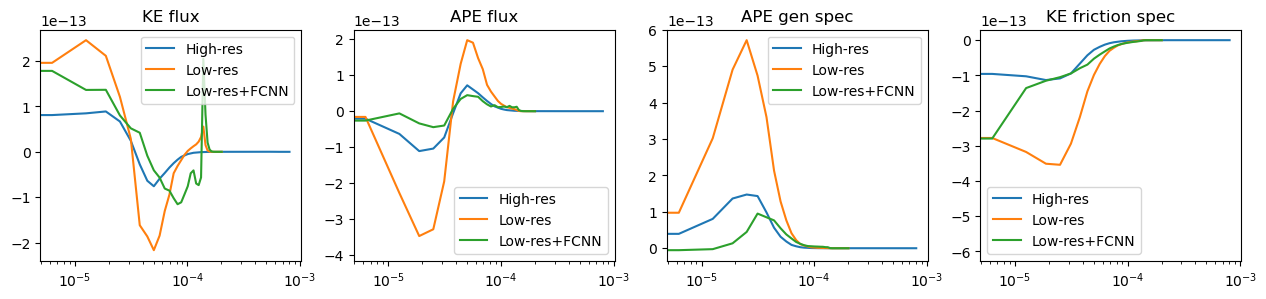

In [99]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='KE flux')
plt.semilogx(eddy_model_highRes.KEflux.k, eddy_model_highRes.KEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEflux.k, eddy_model_lowRes.KEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEflux.k, param_run.KEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,2, title='APE flux')
plt.semilogx(eddy_model_highRes.APEflux.k, eddy_model_highRes.APEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEflux.k, eddy_model_lowRes.APEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEflux.k, param_run.APEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,3, title='APE gen spec')
plt.semilogx(eddy_model_highRes.APEgenspec.k, eddy_model_highRes.APEgenspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEgenspec.k, eddy_model_lowRes.APEgenspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEgenspec.k, param_run.APEgenspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,4, title='KE friction spec')
plt.semilogx(eddy_model_highRes.KEfrictionspec.k, eddy_model_highRes.KEfrictionspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEfrictionspec.k, eddy_model_lowRes.KEfrictionspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEfrictionspec.k, param_run.KEfrictionspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()